# Exploratory Data Analysis

# Introduction

In this Exploratory Data Analysis (EDA), our initial step involves importing the cleaned dataset. Then we will delve into the data using the describe() function, which provides a statistical summary, enhancing our understanding of the dataset's characteristics. Subsequently, we will examine the distribution of our numerical data, determining these values' spread and central tendencies. This analysis will be further deepened by exploring the correlation between different numerical variables, enabling us to identify potential relationships and dependencies. Finally, we will construct a refined data frame best suited for our subsequent analyses and develop our predictive models.

In [1]:
# import the relevant libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
# Load the data 
df = pd.read_csv('Olist_clean_data.csv')
df.head()

,order_id,item,product_id,seller_id,item_price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,...,order_purchase_timestamp,review_score,postal_code,state,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sales_revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1,1,2,72.19,...,2017-09-13 8:59,5,28013,18,cool_stuff,650.0,28.0,9.0,14.0,58.9
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1,0,1,73.86,...,2017-06-28 11:52,5,75800,8,cool_stuff,650.0,28.0,9.0,14.0,55.9
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1,1,2,83.23,...,2018-05-18 10:25,4,30720,10,cool_stuff,650.0,28.0,9.0,14.0,64.9
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1,1,3,75.07,...,2017-08-01 18:38,5,83070,17,cool_stuff,650.0,28.0,9.0,14.0,58.9
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1,1,4,72.19,...,2017-08-10 21:48,5,36400,10,cool_stuff,650.0,28.0,9.0,14.0,58.9


In [3]:
# Define a list of 'numerical_features'
numerical_features = ['item', 'item_price', 'freight_value', 'freight_value','payment_sequential','payment_installments',
                     'payment_value','review_score','postal_code','product_weight_g','product_length_cm','product_height_cm',
                     'product_width_cm','sales_revenue']

## Numerical Evaluation and Correlation

Initially, we'll conduct a statistical analysis of our dataset using the describe() function. Given that this analysis focuses on the sales revenue for each specific product, it's essential to understand the key statistics surrounding this feature. Based on our preliminary exploration, we have identified 115,365 observations in our dataset. We've also noted that the average sales revenue stands at 136.49. The maximum sales revenue recorded is a substantial 13,440, while the minimum value observed is just $.85. This provides us with an initial overview of our sales revenue data's variability and central tendency.

In [4]:
df.describe()

,item,item_price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,postal_code,state,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sales_revenue
count,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000,115220.000000
mean,1.194281,120.724622,20.065539,1.093369,0.926185,2.943899,172.480671,4.033475,35061.956075,18.692111,2115.576523,30.306032,16.649419,23.108662,136.541734
std,0.684331,182.814256,15.849391,0.727924,0.645439,2.779449,266.102948,1.385670,29838.281714,7.065621,3782.899552,16.212689,13.483560,11.751848,215.996073
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1003.000000,0.000000,0.000000,7.000000,2.000000,6.000000,0.850000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,1.000000,60.940000,4.000000,11310.000000,12.000000,300.000000,18.000000,8.000000,15.000000,45.000000
50%,1.000000,74.900000,16.320000,1.000000,1.000000,2.000000,108.120000,5.000000,24241.000000,22.000000,700.000000,25.000000,13.000000,20.000000,83.900000
75%,1.000000,134.900000,21.220000,1.000000,1.000000,4.000000,189.560000,5.000000,58745.000000,25.000000,1800.000000,38.000000,20.000000,30.000000,149.900000
max,21.000000,6735.000000,409.680000,29.000000,3.000000,24.000000,13664.080000,5.000000,99980.000000,26.000000,40425.000000,105.000000,105.000000,118.000000,13440.000000


Progressing further, we'll employ histograms and box plots to visualize the overall data distribution. 

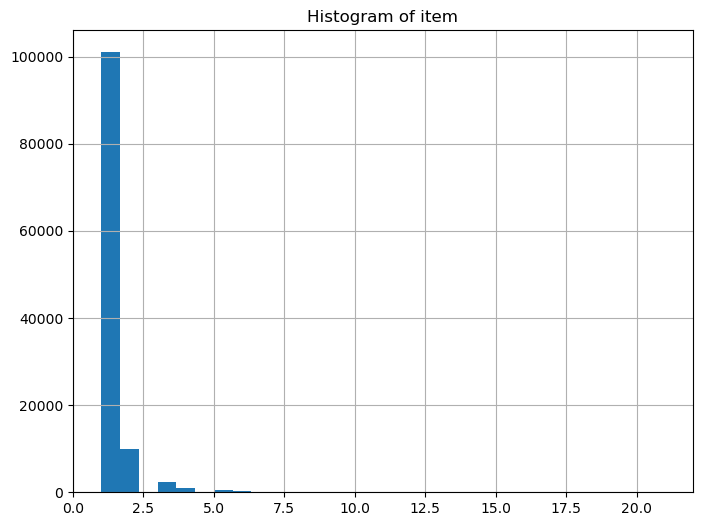

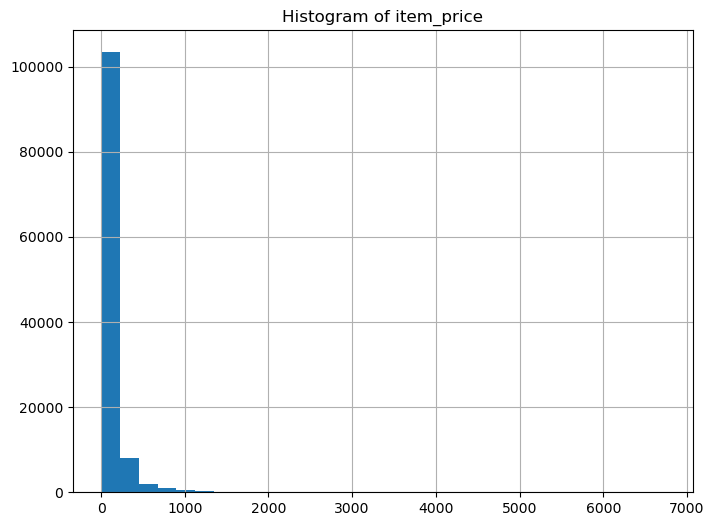

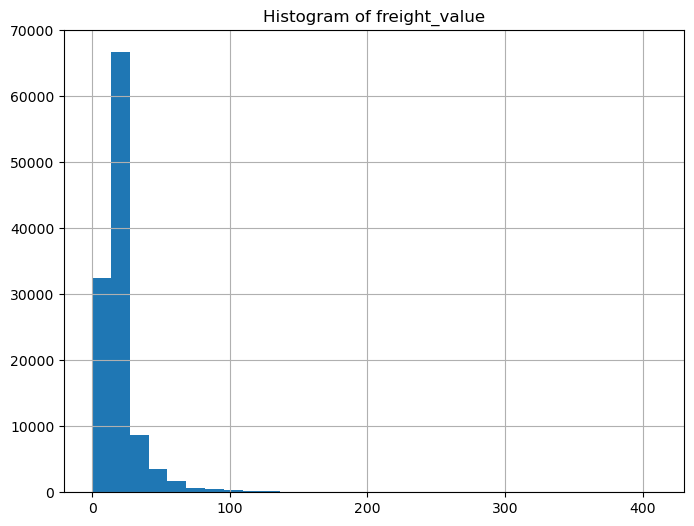

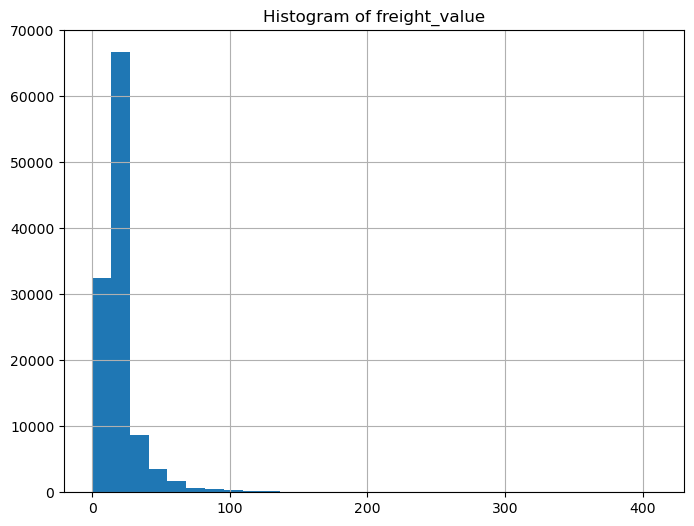

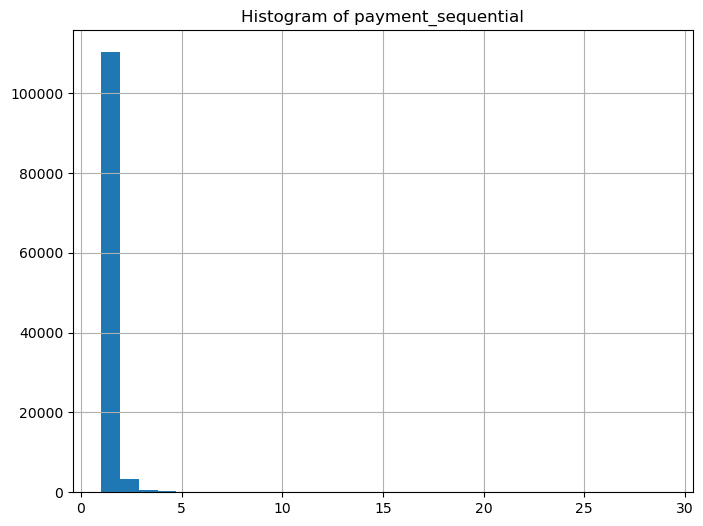

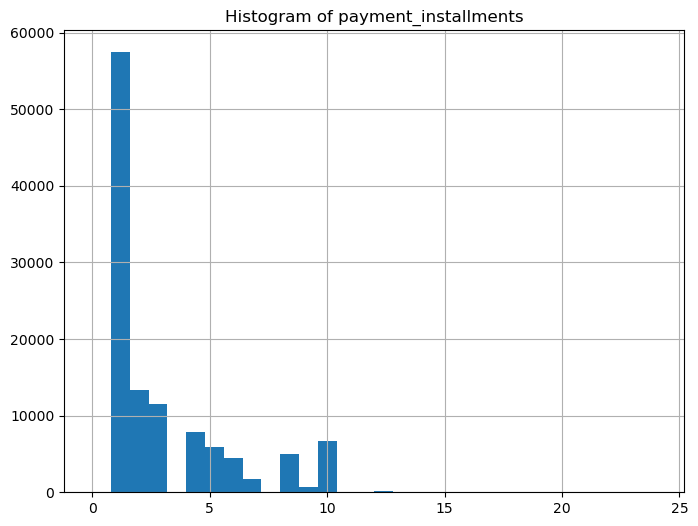

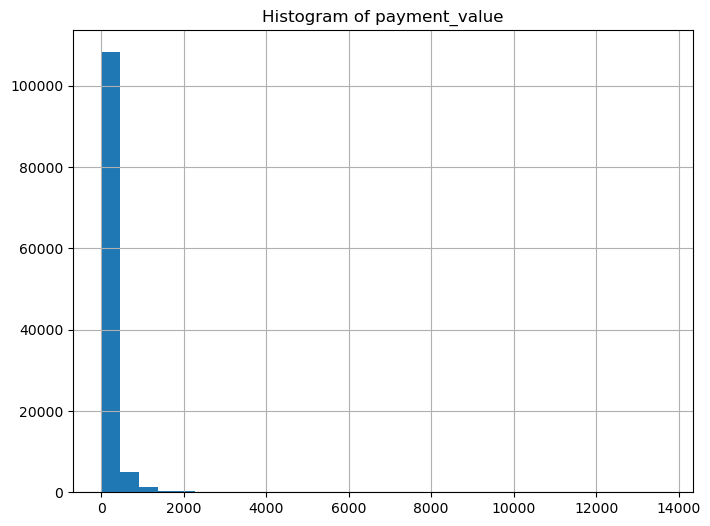

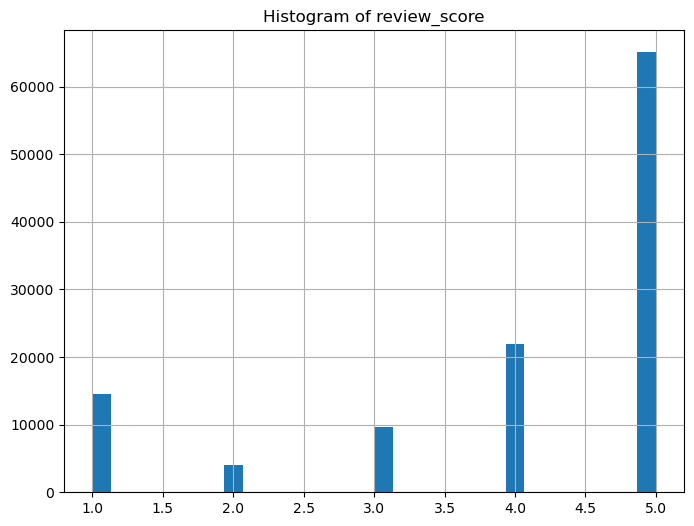

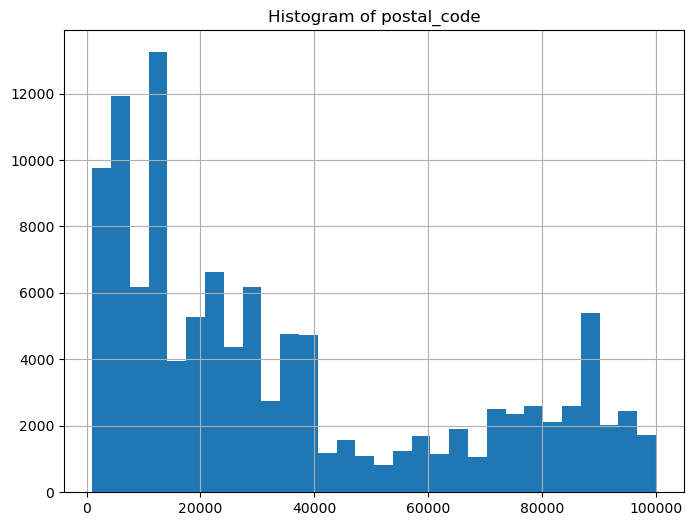

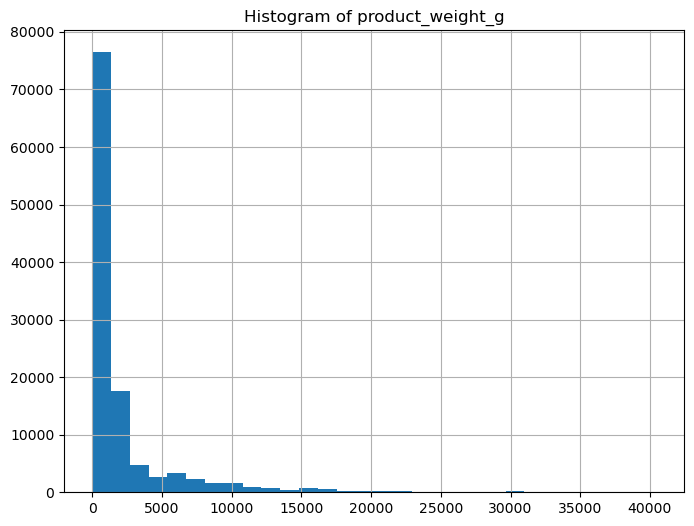

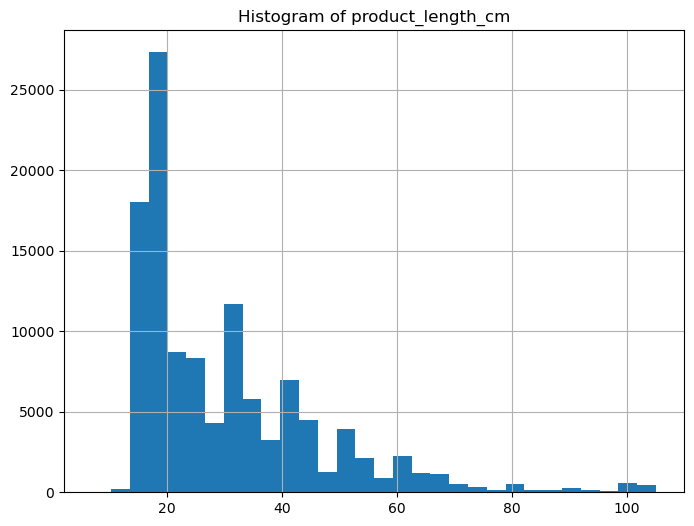

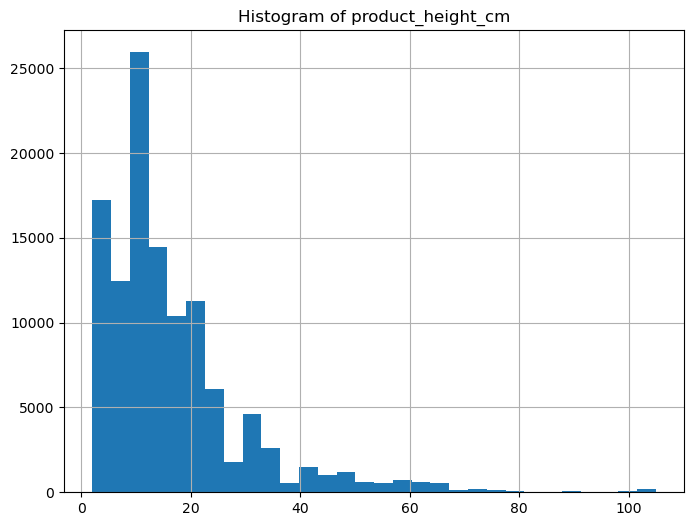

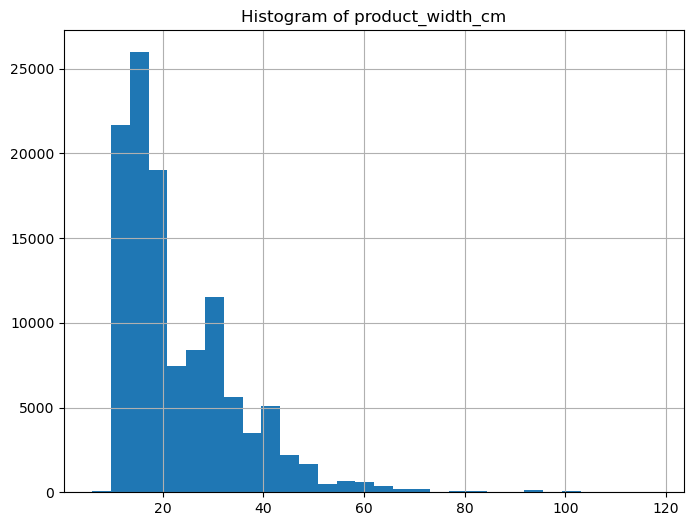

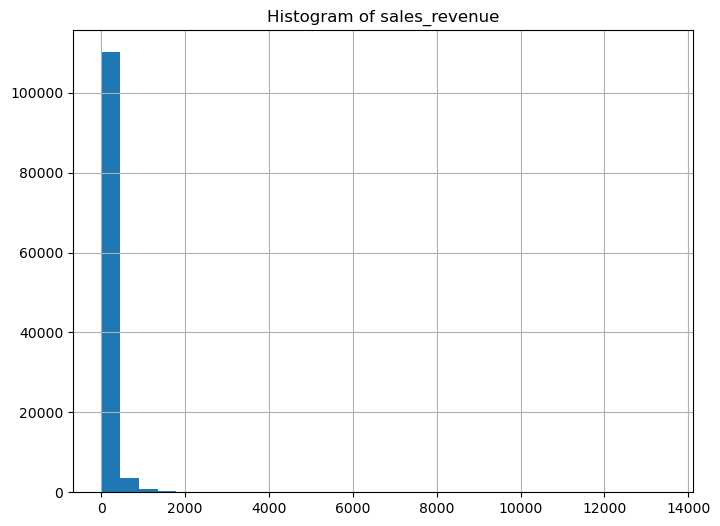

In [5]:
# Plot histogram for each numerical feature in 'df'.for feature in numerical_features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    df[feature].hist(bins=30)
    plt.title(f'Histogram of {feature}')
    plt.show()

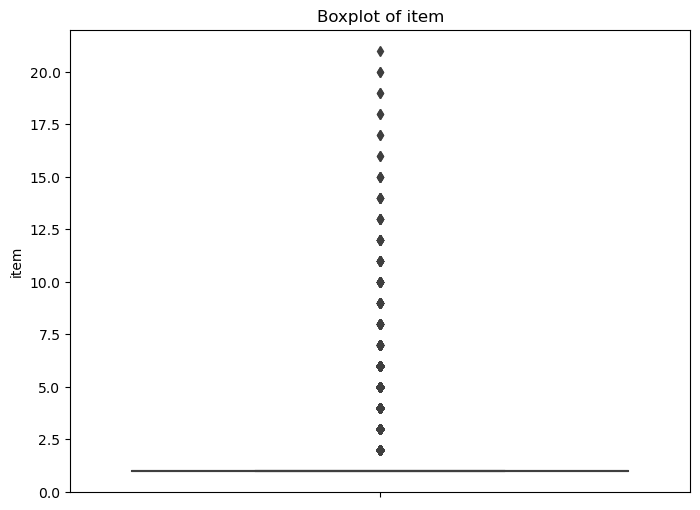

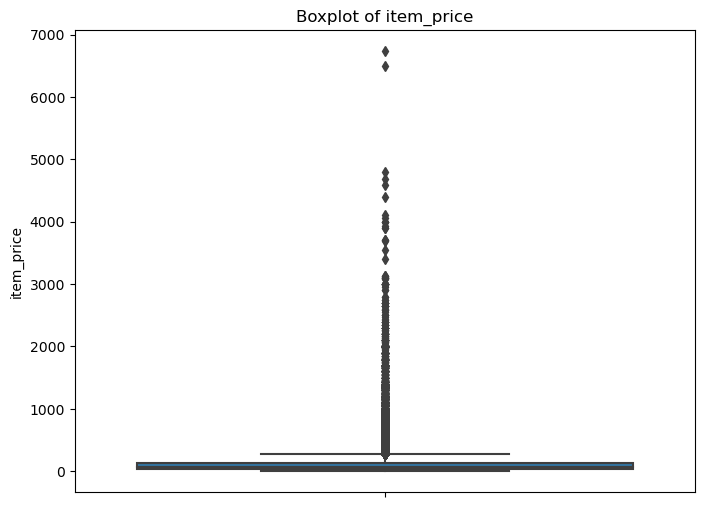

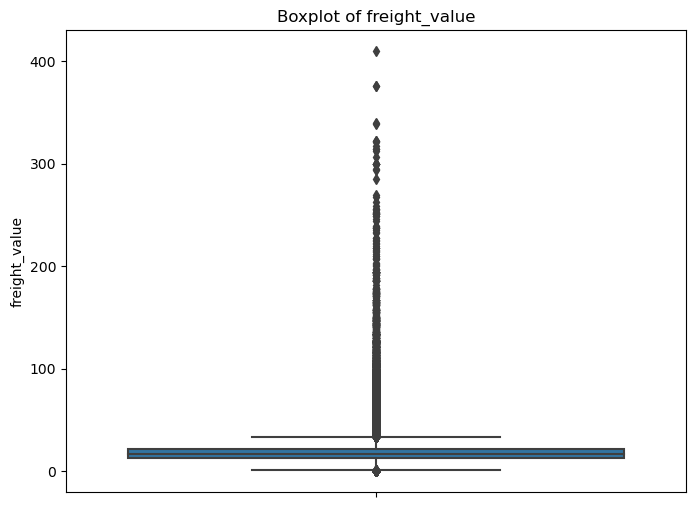

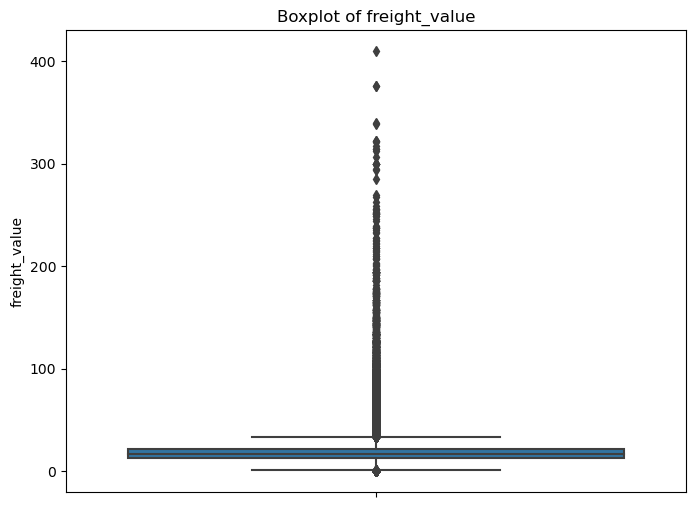

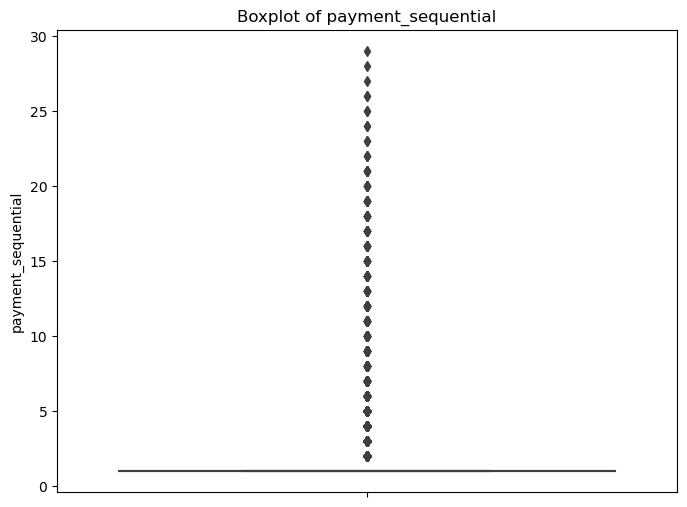

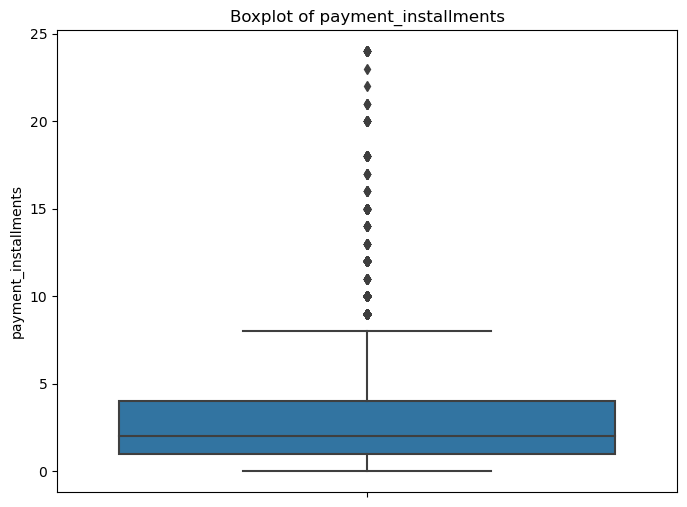

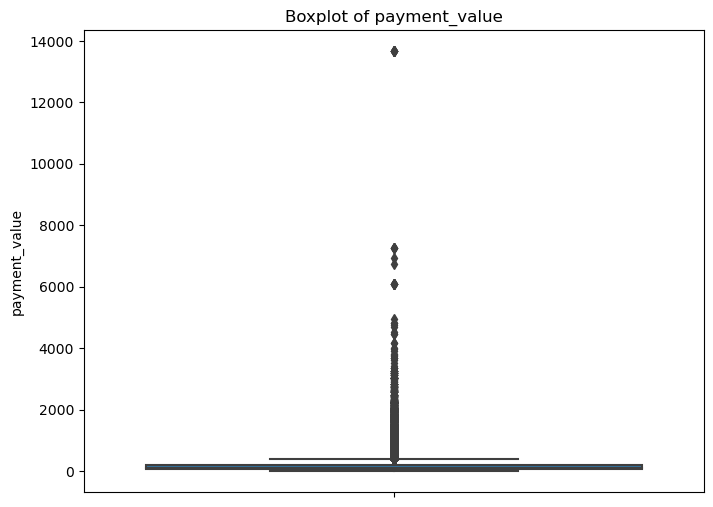

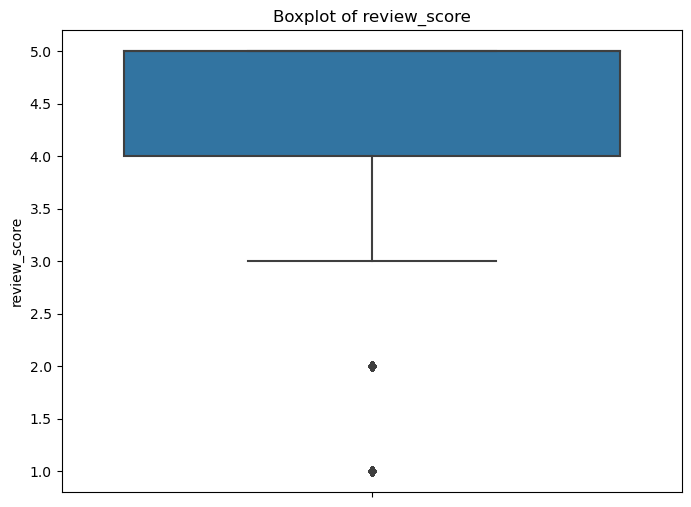

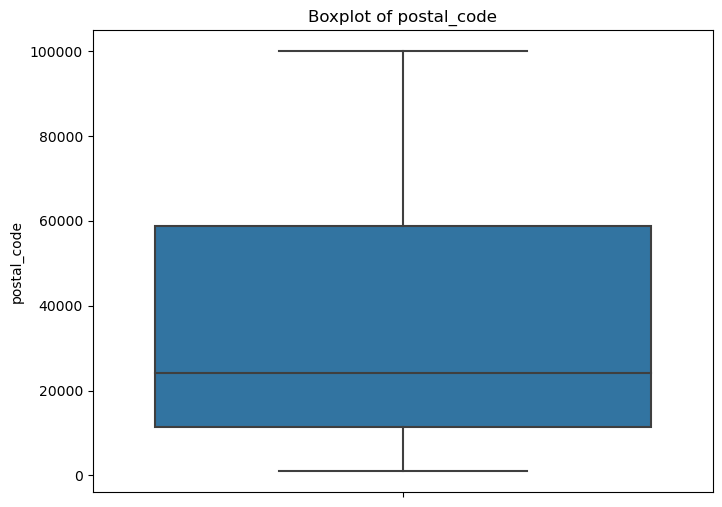

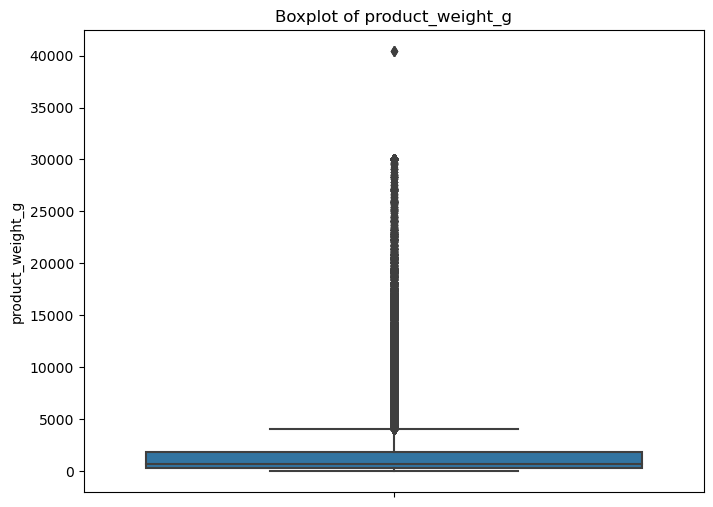

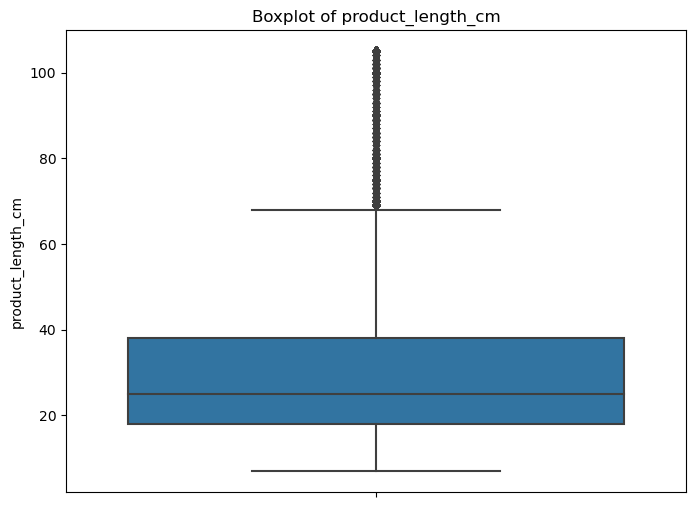

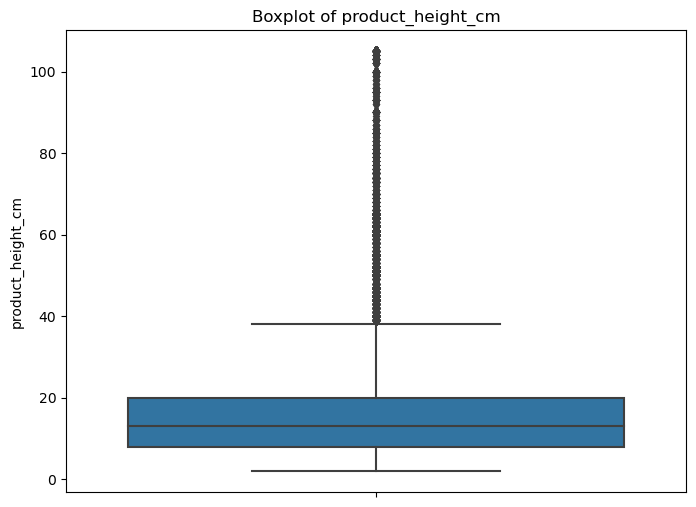

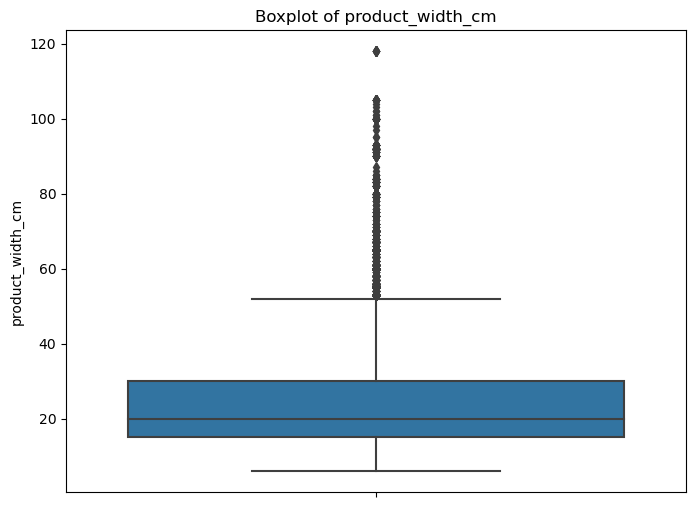

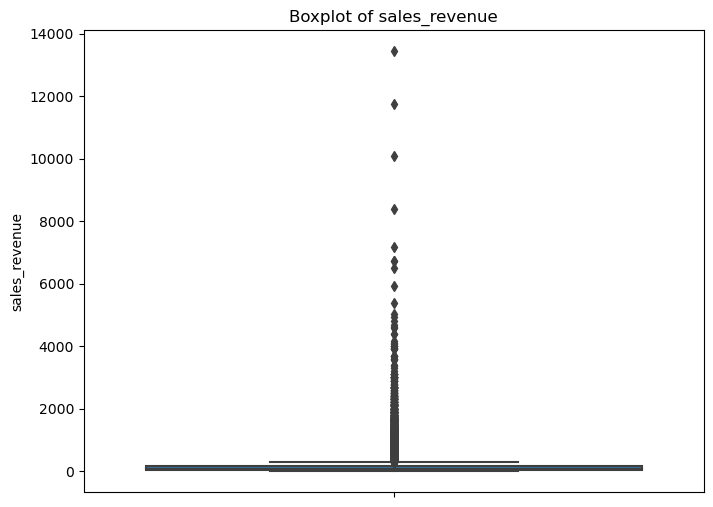

In [6]:
# Plot boxplot for each numerical feature in 'df'.
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y = feature, data = df)
    plt.title(f'Boxplot of {feature}')
    plt.show()

The above plots reveal that most numerical features in our dataset exhibit a right skew. This implies that their mean and median values are greater than their modes. Additionally, from the box plots, we discern the presence of outliers in some features. These outliers can significantly affect certain statistical measures and analyses, so it's crucial to identify and appropriately handle them in subsequent preprocessing steps.

In the next step, we'll utilize the corr() function to compute pairwise correlation metrics among the dataset's features. We will then generate a mask for the upper triangle of this correlation matrix. To visualize these correlations, we will create a heatmap, which will allow us to understand better the interrelationships between various features that are pertinent to our analysis.

C:\Users\Work&Study\AppData\Local\Temp\ipykernel_7352\1393360261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


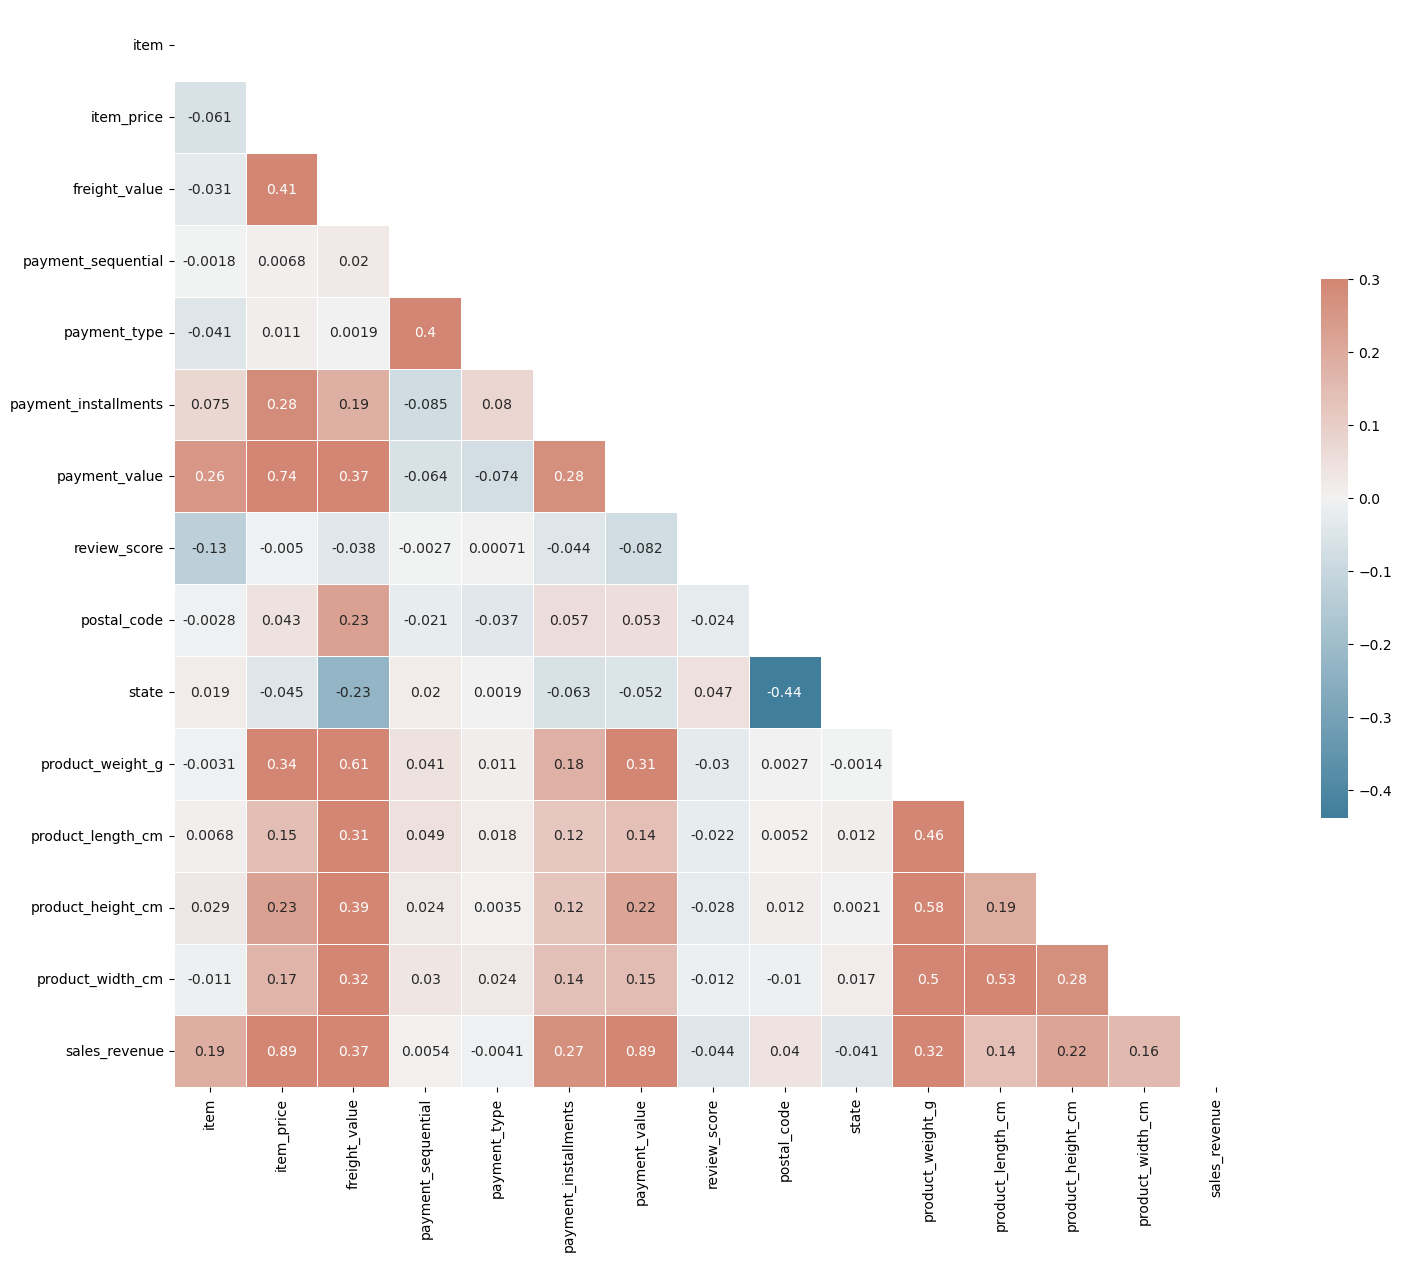

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

The heatmap shows some collinearity between 'item_price' and 'payment_value'. Given the importance of 'item_price' for our forthcoming predictive models, we remove 'payment_value' to avoid the multicollinearity issue.

Subsequently, we'll eliminate any columns that are either irrelevant to our analysis or exhibit high correlation with other variables. This is a crucial step in reducing noise and potential multicollinearity in our dataset, ensuring our future predictive models are both accurate and interpretable.

In [8]:
# Define columns to drop that are either irrelevant or highly correlated.
columns_to_drop = [ 'order_id', 'seller_id', 
                   'customer_id','payment_value','item',
                                      ]

# Drop the defined columns from the dataframe.
df= df.drop(columns_to_drop, axis=1)

Finally, we will save this refined dataframe as a new CSV file, setting the stage for further in-depth analysis and modeling.

In [10]:
# Save the data to a new file for use it for further analysis
df.to_csv('Olist_Final1.csv', index=False)

# Conclusion

In conclusion, throughout this Exploratory Data Analysis (EDA), we first inspected the statistical relationships among the numerical values in the dataset. We examined the distribution patterns of the data, observing that most numerical values are right-skewed. We also identified outliers in some numerical features. Utilizing a correlation heatmap, we detected multicollinearity between certain features. Lastly, we removed those features that either demonstrated high correlation or were irrelevant to our analysis. This comprehensive examination provides a sound basis for our future data analysis and predictive modeling tasks.